<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/d_DB_scan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part D
## DB Scan Clustering via PyCaret Library

Hints:   
1. [PyCaret 3.0 Documentation](https://pycaret.gitbook.io/docs/)
2. [Clustering Made Easy with PyCaret](https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080)
3. [Clustering Tutorial (CLU101) - Level Beginner](https://www.pycaret.org/tutorials/html/CLU101.html)

Dataset Source:

[Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Sources Used:
1. ChatGPT-4
2. All listed hints

## Description of DBSCAN
The core idea of DBSCAN is around concept of dense regions. The assumption is that natural clusters are composed of densely located points. This requires definition of “dense region”. To do these two parameters are required for DBSCAN algorithm.

- Eps, ε - distance
- MinPts - Minimum number of points within distance Eps

Optionally the distance metric can be specified by a user, but usually Euclidean distance is implemented (like in scikit learn).

A “dense region” is therefore created by a minimum number of points within distance between all of them, Eps. Points which are within this distance but not close to minimum number of other points are treated as “border points”. Remaining ones are noise or outliers.

## Setup

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 94.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.9 MB/s

## Code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
dataset_file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_d/mall_customers.csv'

In [6]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

### Reading/Loading Data


In [7]:
data = pd.read_csv(dataset_file_path)

rows = data.shape[0]
cols = data.shape[1]

print(f"There are {rows} rows in the dataset.")
print(f"There are {cols} columns in the dataset.")

There are 200 rows in the dataset.
There are 5 columns in the dataset.


In [8]:
print("See below for the number of missing values in each column: ")
data.isnull().sum()

See below for the number of missing values in each column: 


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
91,92,Male,18,59,41
100,101,Female,23,62,41
184,185,Female,41,99,39
33,34,Male,18,33,92
83,84,Female,46,54,44


In [11]:
import pandas as pd

data = data.drop(columns=['CustomerID'])


In [12]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

### Exploratory Data Analysis
This section is where we will be performing exploratory data analysis on the dataset.

In [13]:
min_male_age = data[data['Gender'] == 'Male']['Age'].min()
max_male_age = data[data['Gender'] == 'Male']['Age'].max()

min_female_age = data[data['Gender'] == 'Female']['Age'].min()
max_female_age = data[data['Gender'] == 'Female']['Age'].max()

print(f"Male ages: min={min_male_age} max={max_male_age}")
print(f"Female ages: min={min_female_age} max={max_female_age}")

Male ages: min=18 max=70
Female ages: min=18 max=68


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [15]:
males_age = data[data['Gender']=='Male']['Age'] # subset with males age
females_age = data[data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,70,5)

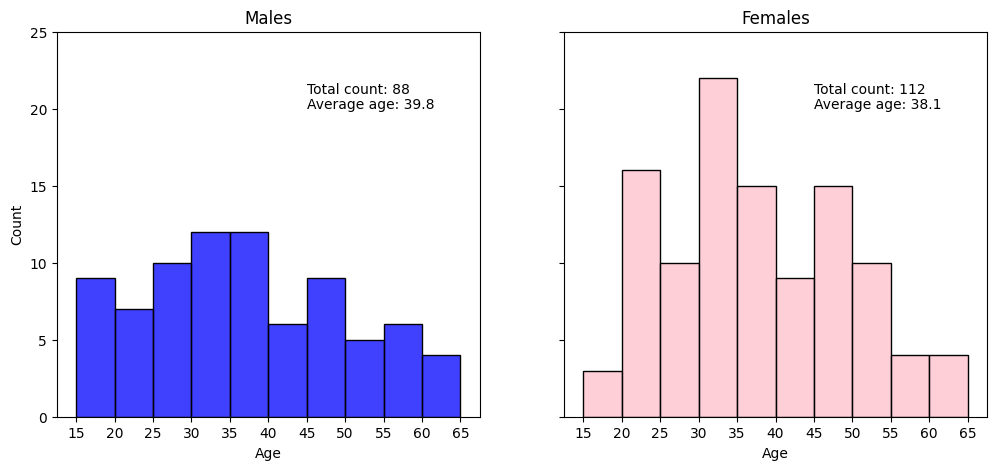

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for males using histplot
sns.histplot(males_age, bins=age_bins, kde=False, color='#0000FF', ax=ax1, edgecolor="k", linewidth=1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45, 21, "Total count: {}".format(males_age.count()))
ax1.text(45, 20, "Average age: {:.1f}".format(males_age.mean()))

# Histogram for females using histplot
sns.histplot(females_age, bins=age_bins, kde=False, color='#FFC0CB', ax=ax2, edgecolor="k", linewidth=1)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45, 21, "Total count: {}".format(females_age.count()))
ax2.text(45, 20, "Average age: {:.1f}".format(females_age.mean()))

plt.show()


In [17]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})  # Converting Gender to numerical

#### EDA Findings
We can see above that the ages for males is very flat in the middle, while the majority of female ages tend to have a slightly lower average.

### DBScan Clustering Using Pycaret

In [18]:
# Importing pyCaret
from pycaret.clustering import *

# Setting up the pyCaret environment
clustering_setup = setup(data=data)

# Creating a model - DBSCAN
dbscan_model = create_model('dbscan')

# Assigning the clusters
dbscan_results = assign_model(dbscan_model)

,Description,Value
0,Session id,4712
1,Original data shape,"(200, 4)"
2,Transformed data shape,"(200, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
# Displaying the results
print(dbscan_results.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)     Cluster
0       0   19                  15                      39  Cluster -1
1       0   21                  15                      81  Cluster -1
2       1   20                  16                       6  Cluster -1
3       1   23                  16                      77  Cluster -1
4       1   31                  17                      40  Cluster -1


In [20]:
# Importing necessary libraries from pyCaret for visualization
from pycaret.clustering import plot_model

# Cluster scatter plot in 2D
plot_model(dbscan_model, plot = 'cluster')

# t-SNE plot
plot_model(dbscan_model, plot = 'tsne')


### Conclusion

In this assignment, we applied the DBSCAN clustering algorithm to a dataset containing customer data with features such as 'Gender', 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'. DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm that identifies clusters as high-density areas separated by areas of low density. It's particularly effective for datasets with noise and outliers.

Our process began with preprocessing the data, where 'Gender' was encoded numerically, and the 'CustomerID' column was dropped as it was not relevant for clustering. We then used pyCaret, a powerful, easy-to-use Python library for machine learning, to streamline the clustering process. Within pyCaret, we normalized the numerical features to ensure equal contribution to the distance calculations and set up the DBSCAN model. We fine-tuned parameters like `eps` and `min_samples` to achieve optimal clustering.

The results of the DBSCAN clustering provided insights into the natural groupings within the customer data, based on their spending behavior and demographic information, offering a foundation for more targeted marketing strategies or customer segmentation analyses.